Automatically includes required packages - you only need to run the cell once

In [ ]:
%pip install pandas --user
%pip install numpy --user
%pip install matplotlib 
%pip install scikit-learn>=1.1.3 --user
%pip install plotly --user
%pip install pmdarima --user
%pip install statsmodels --user
%pip install seaborn --user
%pip install nbformat --user

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import warnings

from matplotlib import pyplot as plt
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split

from pmdarima import auto_arima

import joblib as jb

import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
 
pd.options.mode.chained_assignment = None  # default='warn'
warnings.filterwarnings("ignore")

# Introduction - Data Understanding 
Import initial dataset provided by drivendata <br>
Link: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/

In [3]:
feature_train_values = pd.read_csv("data/dengue_features_train.csv", index_col=[0,1,2])

label_train_values = pd.read_csv("data/dengue_labels_train.csv", index_col=[0,1,2])

## Exploratory data analysis

We begin by examining our collected dataset - to get a generalized overview of our data (& to check wheter or not the import worked as intended), we print the head of both sets:

In [4]:
feature_train_values.head()


week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [5]:
label_train_values.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

The import of both data sets was successful. To get a first generalized numerical overview of our data we call the .describe() function on both sets.

In [6]:
feature_train_values.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [7]:
label_train_values.describe()

,total_cases
count,1456.000000
mean,24.675137
std,43.596000
min,0.000000
25%,5.000000
50%,12.000000
75%,28.000000
max,461.000000


Let's plot the total cases in genereal:

In [8]:

feature_train_values['total_cases']=label_train_values['total_cases']

fig = px.line(feature_train_values,x=feature_train_values['week_start_date'], y=feature_train_values['total_cases'], title="Total cases 1990 - 2010")
fig.show()


In [9]:
# Seperate data for San Juan
sj_train_features = feature_train_values.loc['sj']
sj_train_labels = label_train_values.loc['sj']

# Separate data for Iquitos
iq_train_features = feature_train_values.loc['iq']
iq_train_labels = label_train_values.loc['iq']
# add output var to df
sj_train_features['total_cases'] = sj_train_labels['total_cases'] 
iq_train_features['total_cases'] = iq_train_labels['total_cases'] 

print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

sj_train_labels.head()

San Juan
features:  (936, 22)
labels  :  (936, 1)

Iquitos
features:  (520, 22)
labels  :  (520, 1)


total_cases
year weekofyear             
1990 18                    4
     19                    5
     20                    4
     21                    3
     22                    6

Total cases in San Juan:

In [10]:
fig = px.line(sj_train_features,x=sj_train_features['week_start_date'], y=sj_train_features['total_cases'], title="Total cases San Juan")
fig.update_traces(line_color="#FF2424")

fig.show()

In [11]:
fig = px.line(iq_train_features,x=iq_train_features['week_start_date'], y=iq_train_features['total_cases'], title="Total cases Iquitos")
fig.update_traces(line_color="blue")

fig.show()

Put them both in one plot to compare be able to compare them properly:

In [12]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=sj_train_features['week_start_date'], y=sj_train_features['total_cases'], line=dict(color='red'),name='San Juan'))
fig1.add_trace(go.Scatter(x=iq_train_features['week_start_date'], y=iq_train_features['total_cases'], line=dict(color='blue'),name='Iquitos'))

# Name the X axis
fig1.update_xaxes(title_text='week_start_date')
fig1.update_yaxes(title_text= 'total_cases')
# Show the combined figure
fig1.show()

Lets see if the are visible correlations between all variables in San Juan:

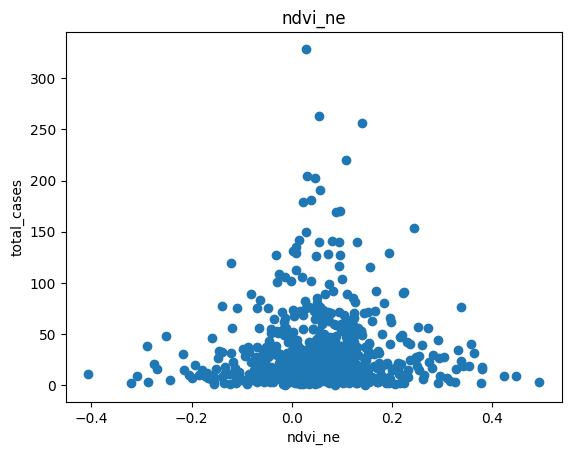

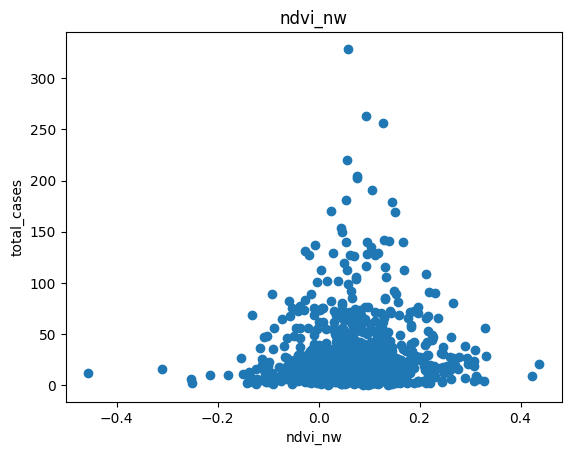

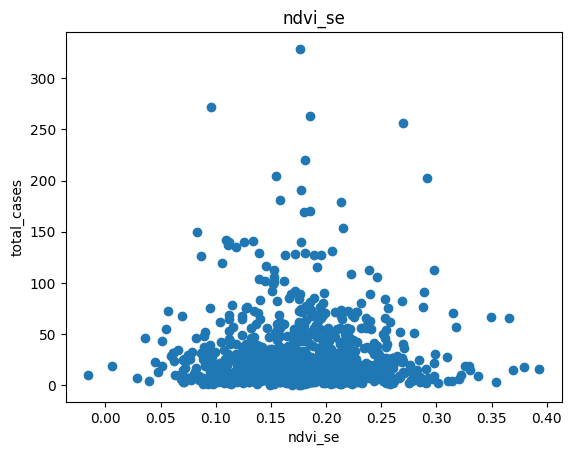

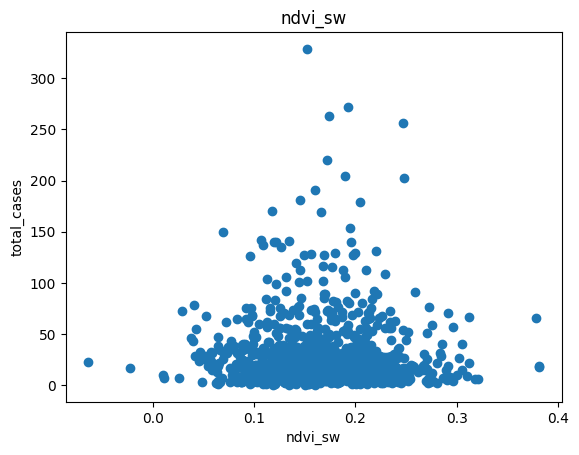

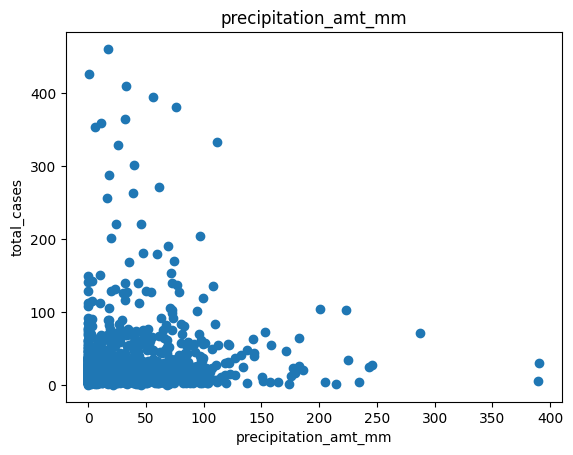

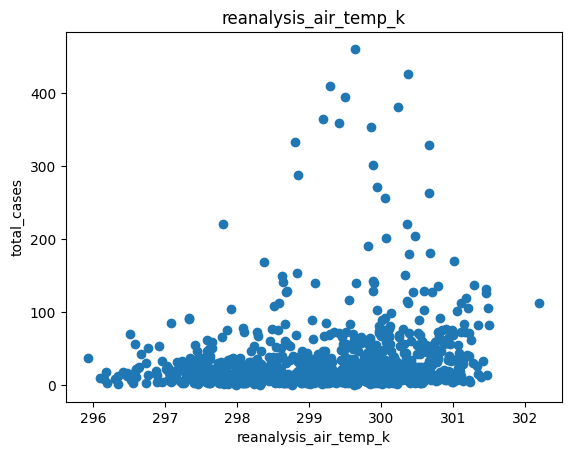

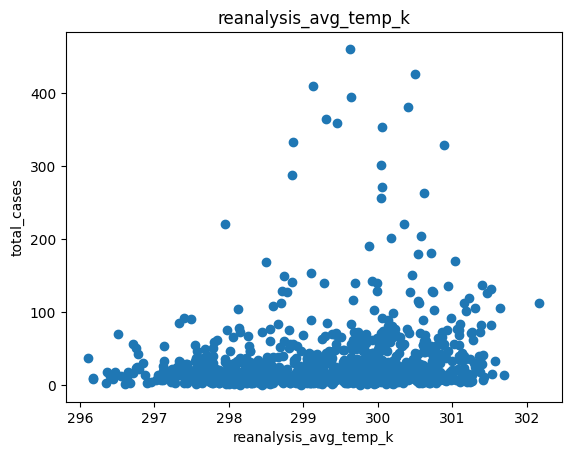

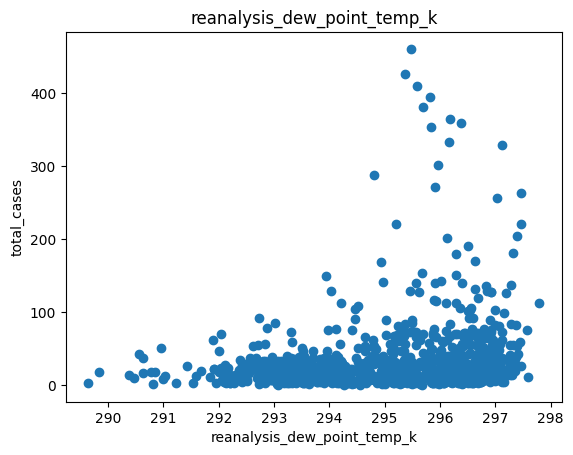

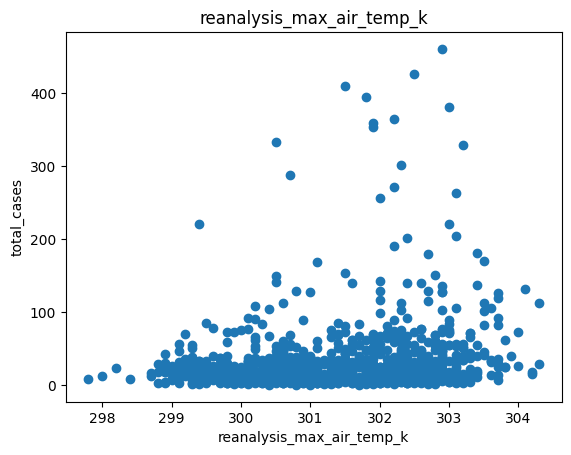

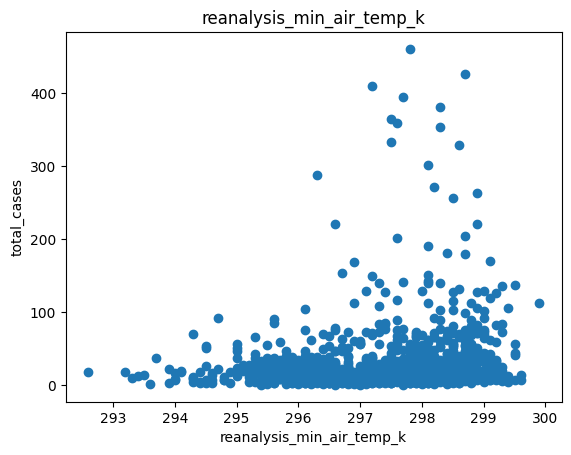

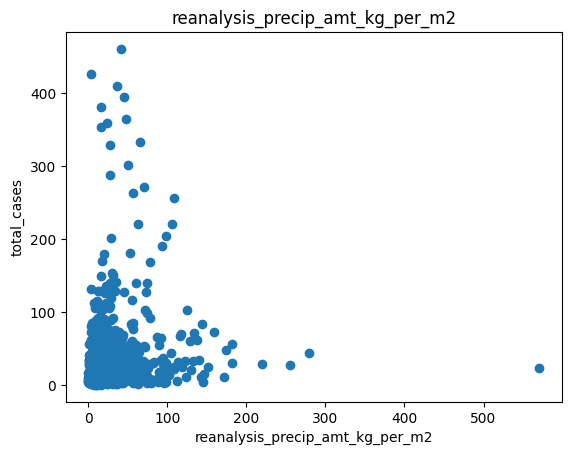

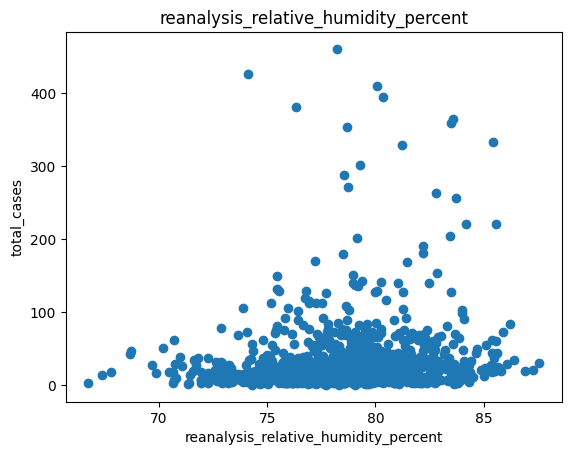

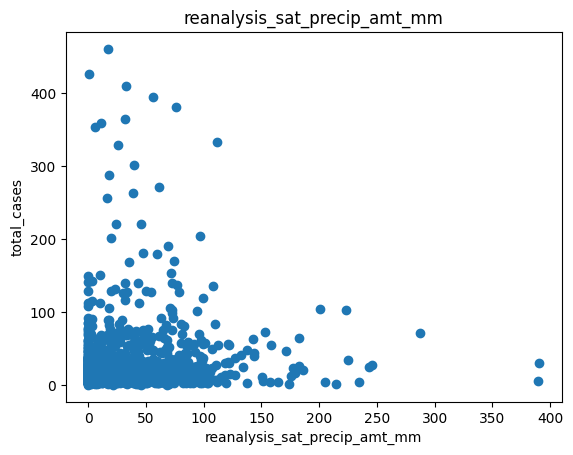

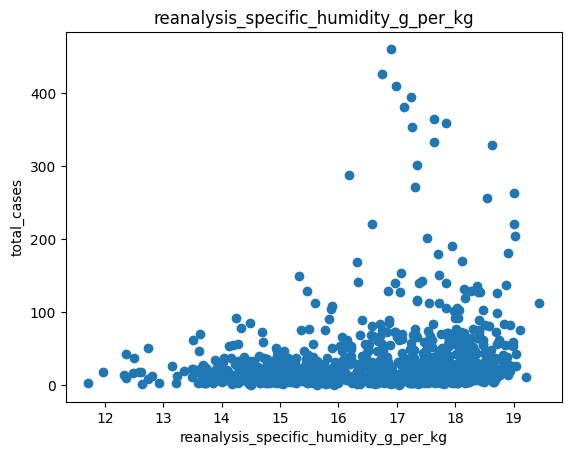

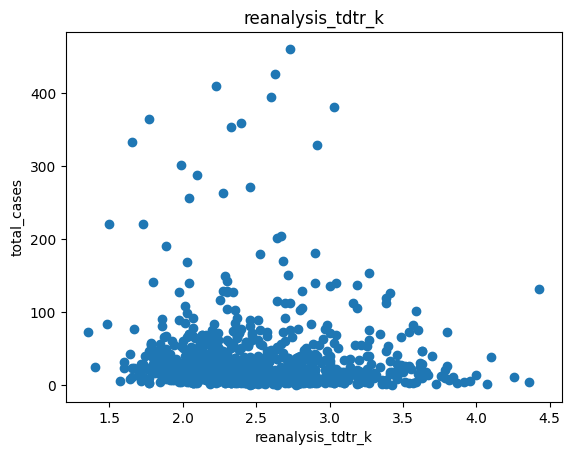

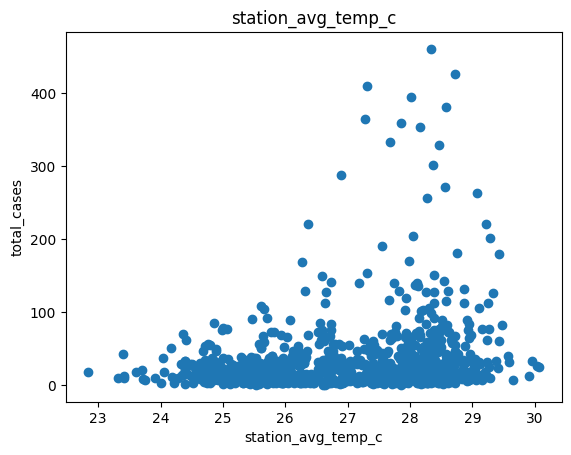

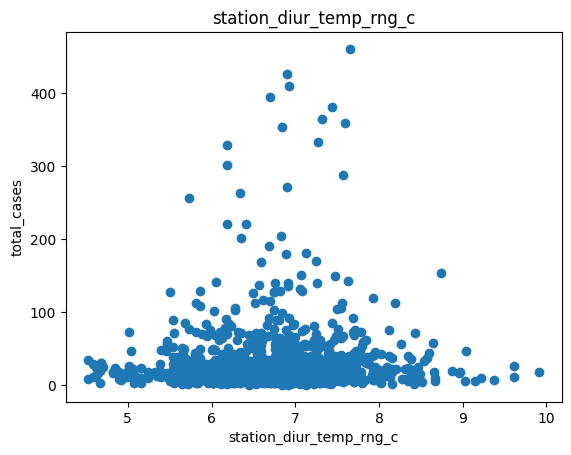

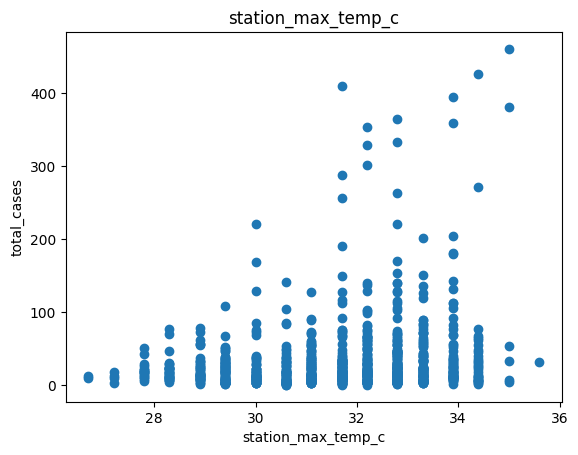

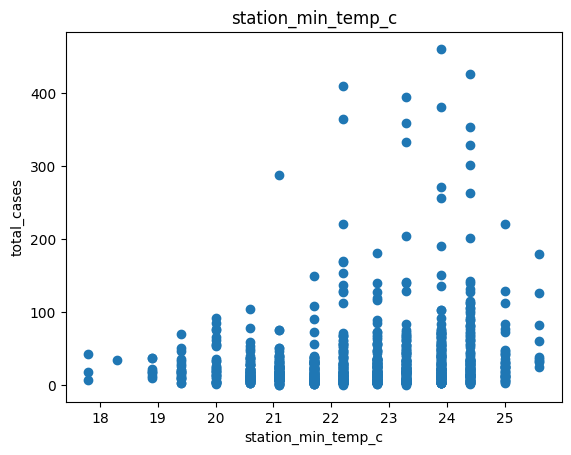

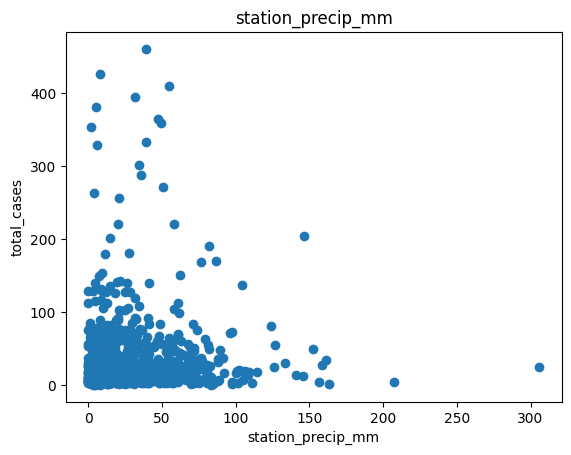

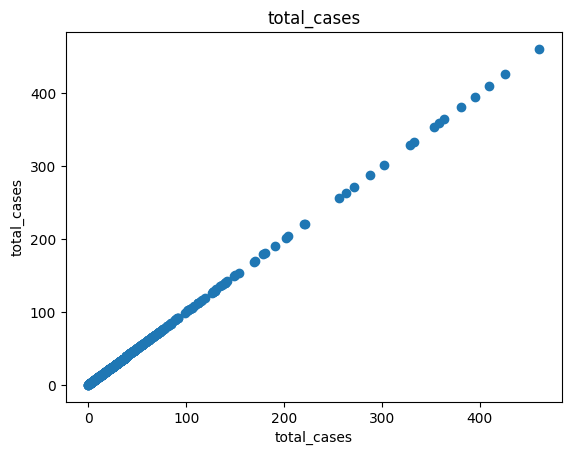

In [13]:
for label in sj_train_features.columns[1:]:
  plt.scatter(sj_train_features[label], sj_train_features["total_cases"])
  plt.title(label)
  plt.ylabel("total_cases")
  plt.xlabel(label)
  plt.show()

Now the same for Iquitos:

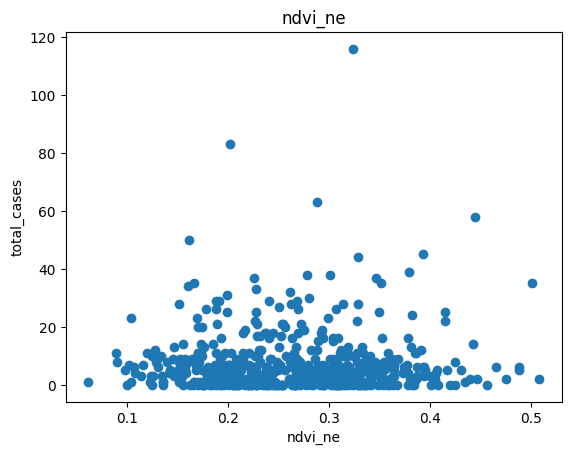

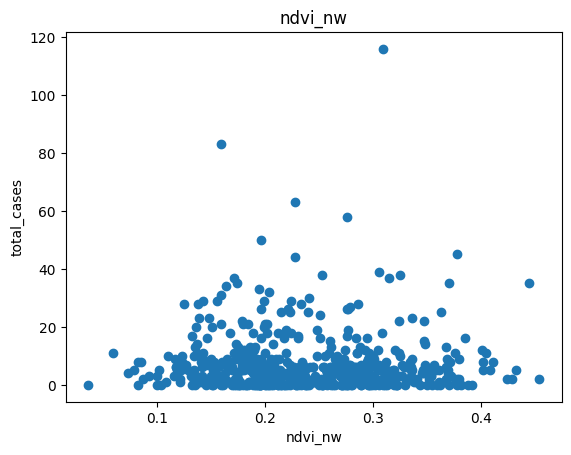

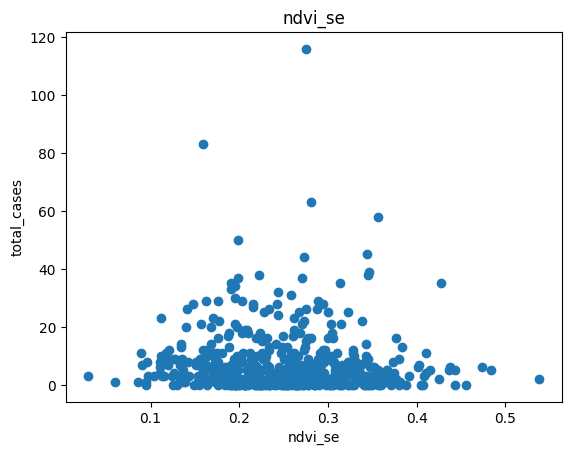

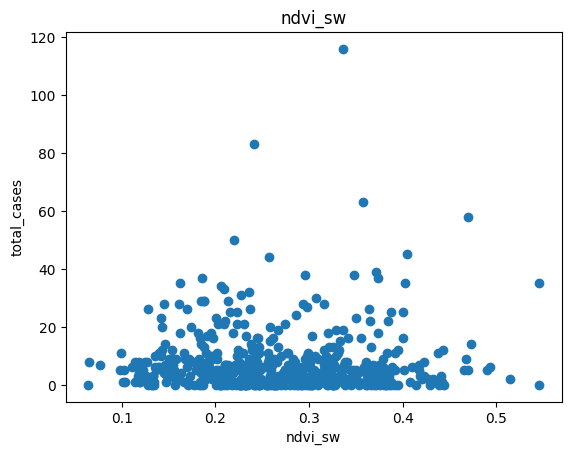

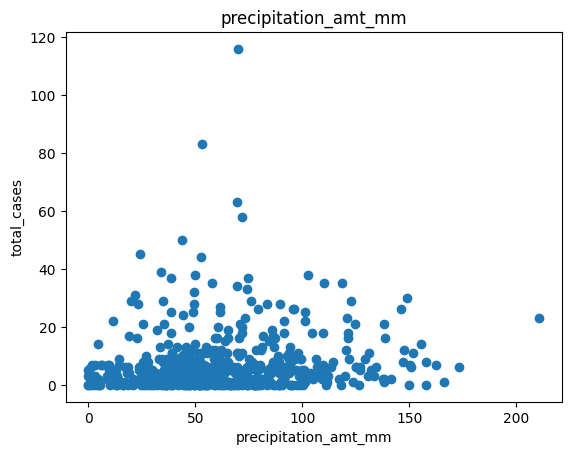

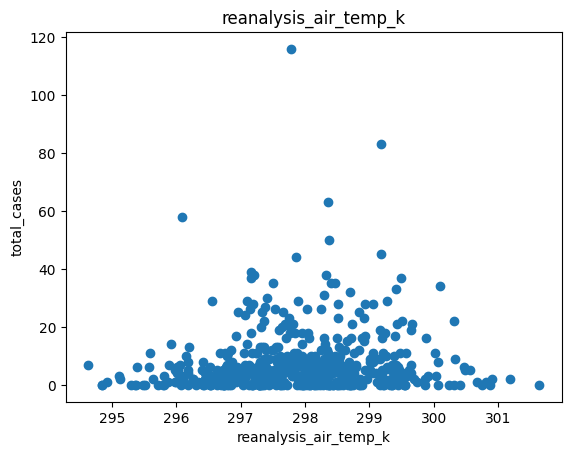

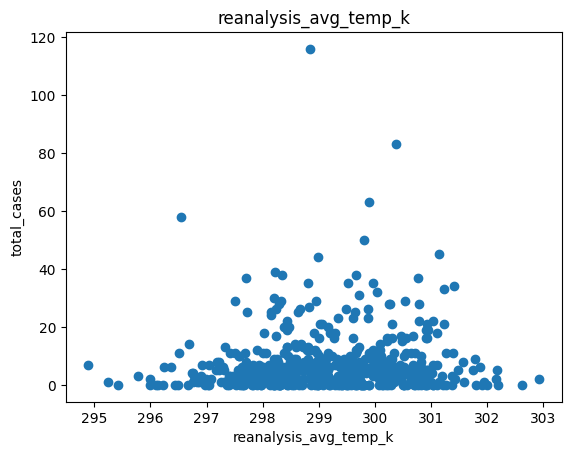

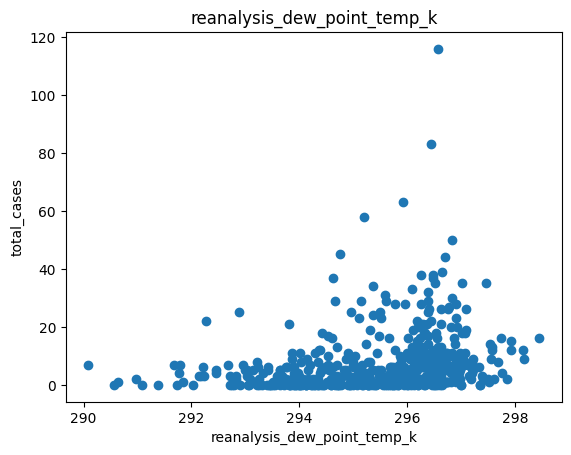

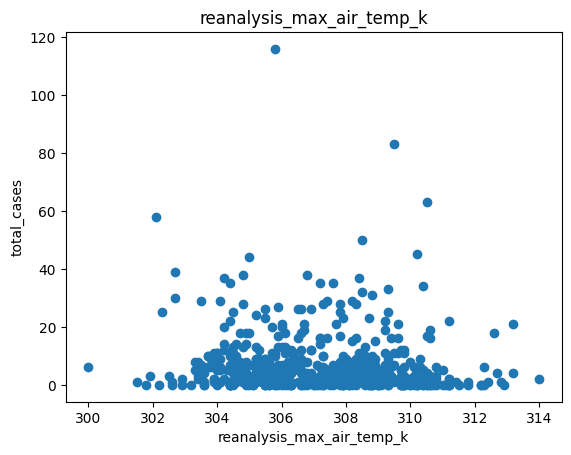

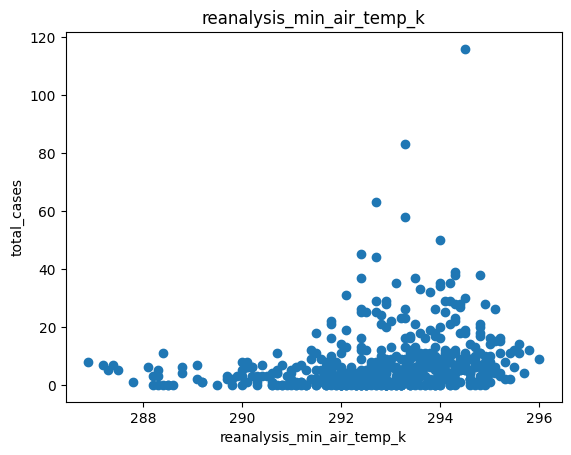

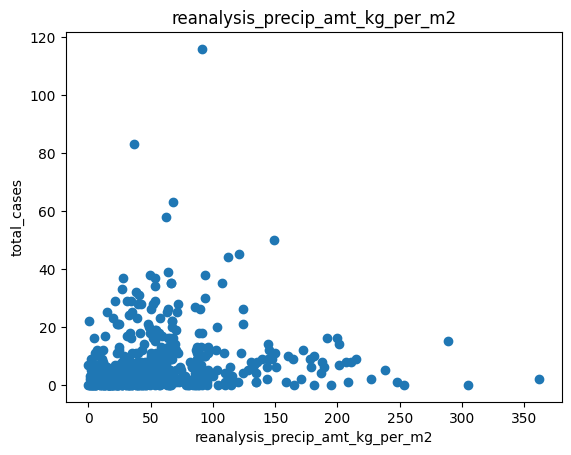

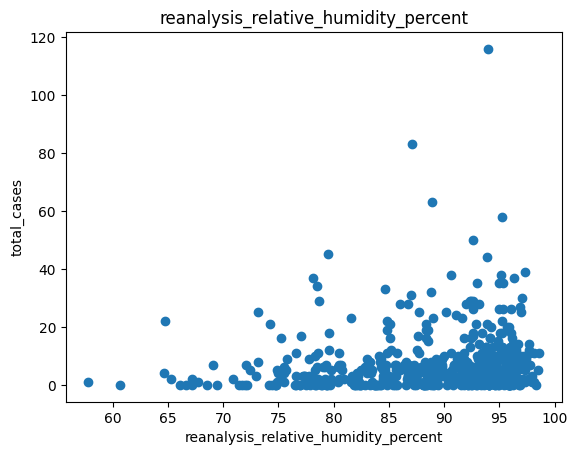

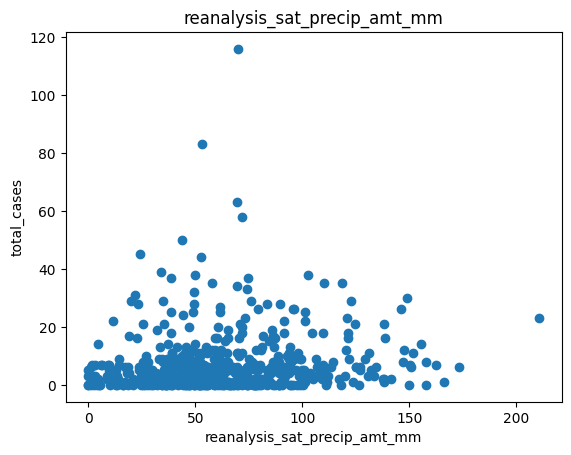

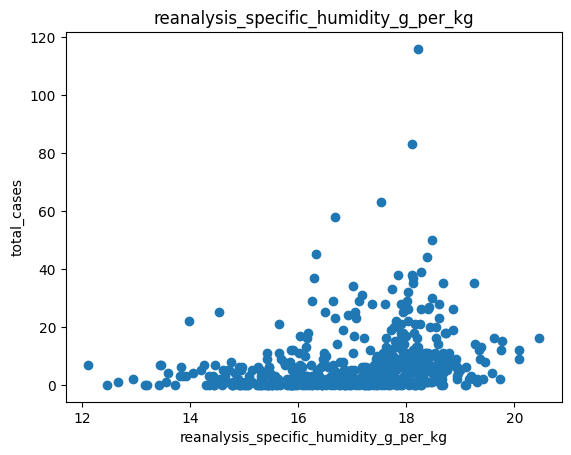

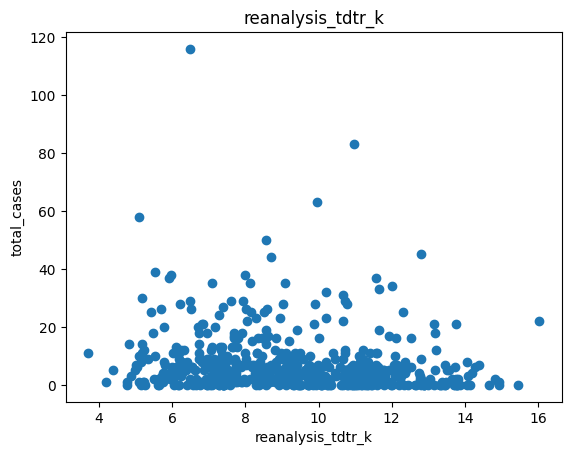

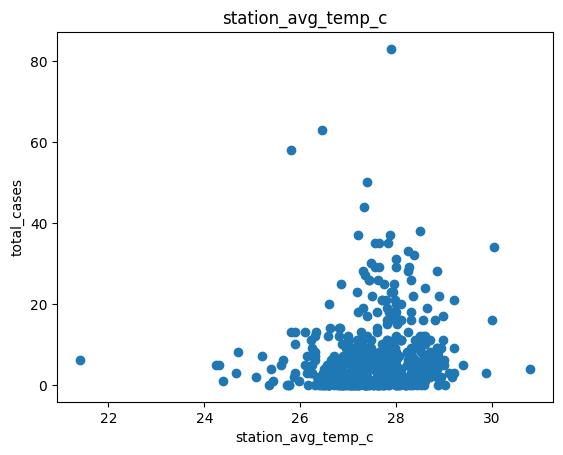

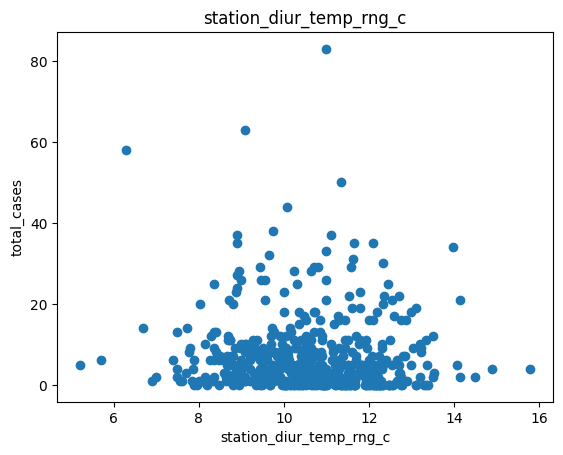

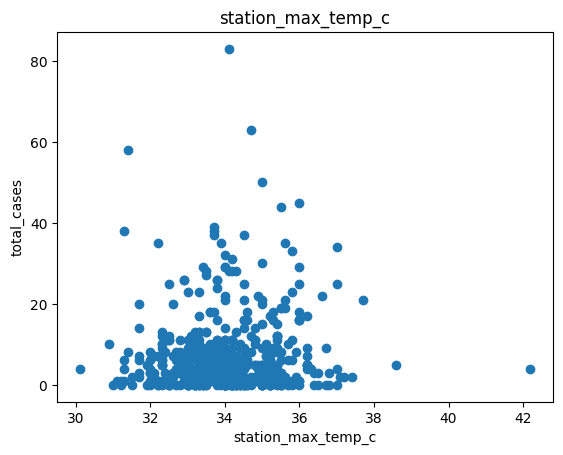

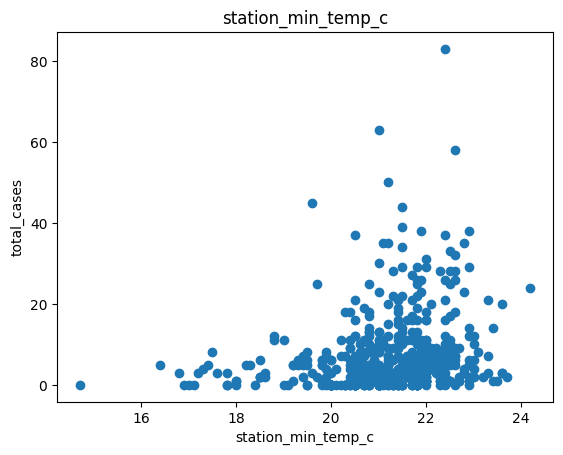

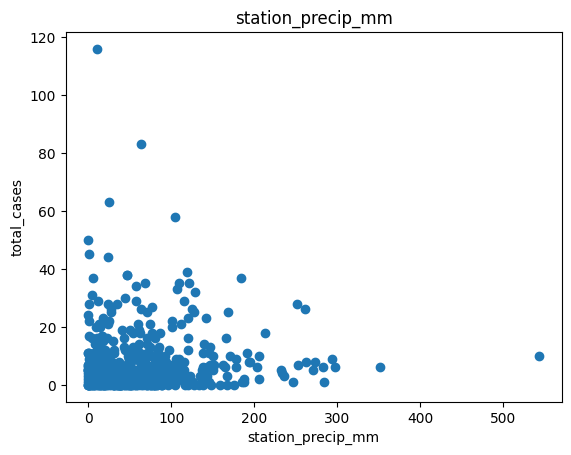

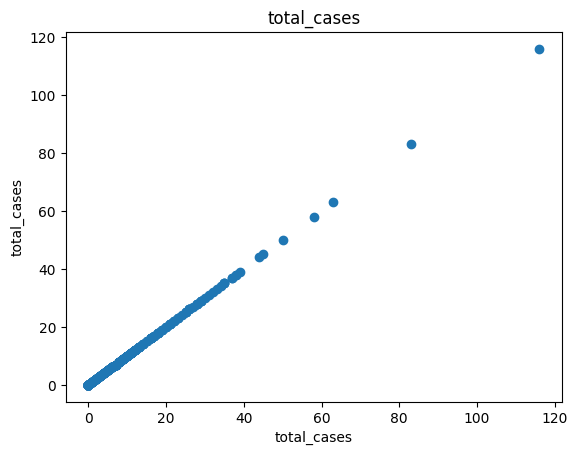

In [14]:
for label in iq_train_features.columns[1:]:
  plt.scatter(iq_train_features[label], iq_train_features["total_cases"])
  plt.title(label)
  plt.ylabel("total_cases")
  plt.xlabel(label)
  plt.show()

What is visible is that there seem to be no linear correlations between the variables in both cities

In [15]:
sj_correlation = sj_train_features.corr() #Compute pairwise correlation of columns
fig = px.imshow(sj_correlation,zmin=-1,zmax=1)


# setting layout of the figure 
fig.update_layout(
    title_text = 'Correlation Heatmap (San Juan)',
    autosize=False,
    width=700,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
))
fig.show()

In [16]:
iq_correlation = iq_train_features.corr() #Compute pairwise correlation of columns
fig2 = px.imshow(iq_correlation,zmin=-1,zmax=1)

# setting layout of the figure 
fig2.update_layout(
    title_text = 'Correlation Heatmap (Iquitos)',
    autosize=False,
    width=700,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
))
fig2.show()


This gives an overview of all correlations which we plotted individually before.

# Data Preparation 

As a first step we should check whether our data contains missing values

In [17]:
# Checking if our lable train values contain any gaps 
pd.isnull(label_train_values).any()


total_cases    False
dtype: bool

In [18]:
# checking the features
pd.isnull(feature_train_values).any()

week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
total_cases  

As we can see there are missing values in almost every row of our data set. To close theses gaps we will fill out each missing value by its own most recent observation 

First, lets count the number of missing values

In [19]:
for label in feature_train_values.columns:
    print(label + " " + str(feature_train_values[label].isna().sum()) + "/" + str(feature_train_values[label].count()))

week_start_date 0/1456
ndvi_ne 194/1262
ndvi_nw 52/1404
ndvi_se 22/1434
ndvi_sw 22/1434
precipitation_amt_mm 13/1443
reanalysis_air_temp_k 10/1446
reanalysis_avg_temp_k 10/1446
reanalysis_dew_point_temp_k 10/1446
reanalysis_max_air_temp_k 10/1446
reanalysis_min_air_temp_k 10/1446
reanalysis_precip_amt_kg_per_m2 10/1446
reanalysis_relative_humidity_percent 10/1446
reanalysis_sat_precip_amt_mm 13/1443
reanalysis_specific_humidity_g_per_kg 10/1446
reanalysis_tdtr_k 10/1446
station_avg_temp_c 43/1413
station_diur_temp_rng_c 43/1413
station_max_temp_c 20/1436
station_min_temp_c 14/1442
station_precip_mm 22/1434
total_cases 0/1456


Now fill them in:

In [20]:
label_train_values.fillna(method='ffill', inplace=True)
feature_train_values.fillna(method='ffill', inplace=True)

Now we check again if every value has been filled in successfully

In [21]:
pd.isnull(feature_train_values).any()

week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
total_cases  

As we can see there are no missing values left in our data set. We now continue with transforming 

We have different units of measurement for the temperature variables: Kelvin and Celsius. Lets transform them all into Celsius:

In [22]:
for label in feature_train_values.columns:
    if label.endswith("_k") and not label.endswith("tdtr_k"):
        l = []
        for x in zip(feature_train_values[label]):
            l.extend([x[0] - 273.15])
        feature_train_values[label] = l
feature_train_values.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42              24.422857   
          19                         22.82              25.061429   
          20                         34.54              25.631429   
          21                         15.36              25.837143   
          22                          7.52              26.368571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                      24.592857                    19.264286   
          19                      25.292857                    20.801429   
          20                      25.728571                    22.284286   
          21                      26.078571                    22.160000   
          22                      26.514286                    22.671429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              26.65  ...   
          19                              27.75  ...   
          20                              27.35  ...   
          21                              28.25  ...   
          22                              28.75  ...   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22                   3.014286           28.942857   

                      station_diur_temp_rng_c  station_max_temp_c  \
city year weekofyear                                                
sj   1990 18                         6.900000                29.4   
          19                         6.371429                31.7   
          20                         6.485714                32.2   
       

Now we just have to seperate our data sets into  San Juan and Iquitos sets

In [23]:
sj_train_features.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,...,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,936.000000
mean,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,301.398817,297.301828,...,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484,34.180556
std,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,1.218637,1.569943,1.258927,1.294705,...,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811,51.381372
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,297.800000,292.600000,...,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000,0.000000
25%,0.004500,0.016425,0.139283,0.129157,0.000000,298.195000,298.300000,293.847857,300.400000,296.300000,...,76.246071,0.000000,15.236429,2.157143,25.842857,6.200000,30.600000,21.700000,6.825000,9.000000
50%,0.057700,0.068075,0.177186,0.165971,20.800000,299.254286,299.378571,295.464286,301.500000,297.500000,...,78.667857,20.800000,16.845714,2.457143,27.228571,6.757143,31.700000,22.800000,17.750000,19.000000
75%,0.111100,0.115200,0.212557,0.202771,52.180000,300.132857,300.228571,296.418929,302.400000,298.400000,...,80.963214,52.180000,17.858571,2.800000,28.185714,7.285714,32.800000,23.900000,35.450000,37.000000
max,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,304.300000,299.900000,...,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000,461.000000


In [24]:
iq_train_features.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,517.000000,517.000000,517.000000,517.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,...,516.000000,516.000000,516.000000,516.000000,483.000000,483.000000,506.000000,512.000000,504.000000,520.000000
mean,0.263869,0.238783,0.250126,0.266779,64.245736,297.869538,299.133043,295.492982,307.082752,292.866667,...,88.639117,64.245736,17.096110,9.206783,27.530933,10.566197,34.004545,21.196680,62.467262,7.565385
std,0.081370,0.076751,0.077354,0.086345,35.218995,1.170997,1.332073,1.417229,2.382980,1.663069,...,7.583889,35.218995,1.445769,2.448525,0.921769,1.535496,1.325261,1.260327,63.245958,10.765478
min,0.061729,0.035860,0.029880,0.064183,0.000000,294.635714,294.892857,290.088571,300.000000,286.900000,...,57.787143,0.000000,12.111429,3.714286,21.400000,5.200000,30.100000,14.700000,0.000000,0.000000
25%,0.200000,0.179540,0.194743,0.204129,39.105000,297.092500,298.221429,294.593929,305.200000,291.975000,...,84.295000,39.105000,16.102857,7.371429,27.000000,9.500000,33.200000,20.600000,17.200000,1.000000
50%,0.263643,0.232971,0.249800,0.262143,60.470000,297.822857,299.121429,295.852143,307.050000,293.050000,...,90.917143,60.470000,17.428571,8.964286,27.600000,10.625000,34.000000,21.300000,45.300000,5.000000
75%,0.319971,0.293929,0.302300,0.325150,85.757500,298.649286,300.123214,296.548571,308.700000,294.200000,...,94.563929,85.757500,18.180357,11.014286,28.100000,11.655000,34.900000,22.000000,85.950000,9.000000
max,0.508357,0.454429,0.538314,0.546017,210.830000,301.637143,302.928571,298.450000,314.000000,296.000000,...,98.610000,210.830000,20.461429,16.028571,30.800000,15.800000,42.200000,24.200000,543.300000,116.000000


And split the data again, now that it has been processed properly.

In [25]:
# Seperate data for San Juan
sj_train_features = feature_train_values.loc['sj']
sj_train_labels = label_train_values.loc['sj']

# Separate data for Iquitos
iq_train_features = feature_train_values.loc['iq']
iq_train_labels = label_train_values.loc['iq']

# add output var to df
sj_train_features['total_cases'] = sj_train_labels['total_cases'] 
iq_train_features['total_cases'] = iq_train_labels['total_cases'] 

We make a copy for our time series model, since it needs the 'week_start_date' variable

In [26]:
arima_features_sj = sj_train_features.copy()
arima_features_iq = iq_train_features.copy()

Our Data Preperation is now complete. 

## Modeling
Since our preprocessing is complete we are now able to build our first models.

### feature selection

In [27]:
def feature_selection(df):
    df = df.drop('week_start_date',axis = 1)
    y = df["total_cases"]
    rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 5, step = 1)
    rfe_selector.fit(df, y)
    print(df.columns[rfe_selector.get_support()])

In [28]:
# for San Jose
feature_selection(sj_train_features)

Index(['reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'station_max_temp_c', 'total_cases'],
      dtype='object')


In [29]:
# for Iquitos
feature_selection(iq_train_features)

Index(['reanalysis_max_air_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_tdtr_k', 'station_precip_mm', 'total_cases'],
      dtype='object')


### Multiple Linear Regression

#### San Juan

In [30]:
# setting input features
X = sj_train_features[['reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'station_max_temp_c']]
#setting target var
y = sj_train_features["total_cases"]
#train / test split 80/20 without shuffeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False) 
# set regresor
regr = linear_model.LinearRegression()
#fit regressor
regr.fit(X_train, y_train)
print(regr.coef_)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
 #fit model
model = sm.OLS(y_train, X_train).fit()
#predict values
y_pred = regr.predict(X_test)
 #print summary
print_model = model.summary()
print(print_model)

[ 0.15153988  0.77962017 -0.06583913  4.90572598]
Intercept: 
 -182.67263975131362
Coefficients: 
 [ 0.15153988  0.77962017 -0.06583913  4.90572598]
                                 OLS Regression Results                                
Dep. Variable:            total_cases   R-squared (uncentered):                   0.325
Model:                            OLS   Adj. R-squared (uncentered):              0.322
Method:                 Least Squares   F-statistic:                              89.73
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                    3.07e-62
Time:                        17:52:42   Log-Likelihood:                         -4048.7
No. Observations:                 748   AIC:                                      8105.
Df Residuals:                     744   BIC:                                      8124.
Df Model:                           4                                                  
Covariance Type:            nonrobust                      

In [31]:
#calculate MAE
print(metrics.mean_absolute_error(y_test, y_pred))

23.73226394096578


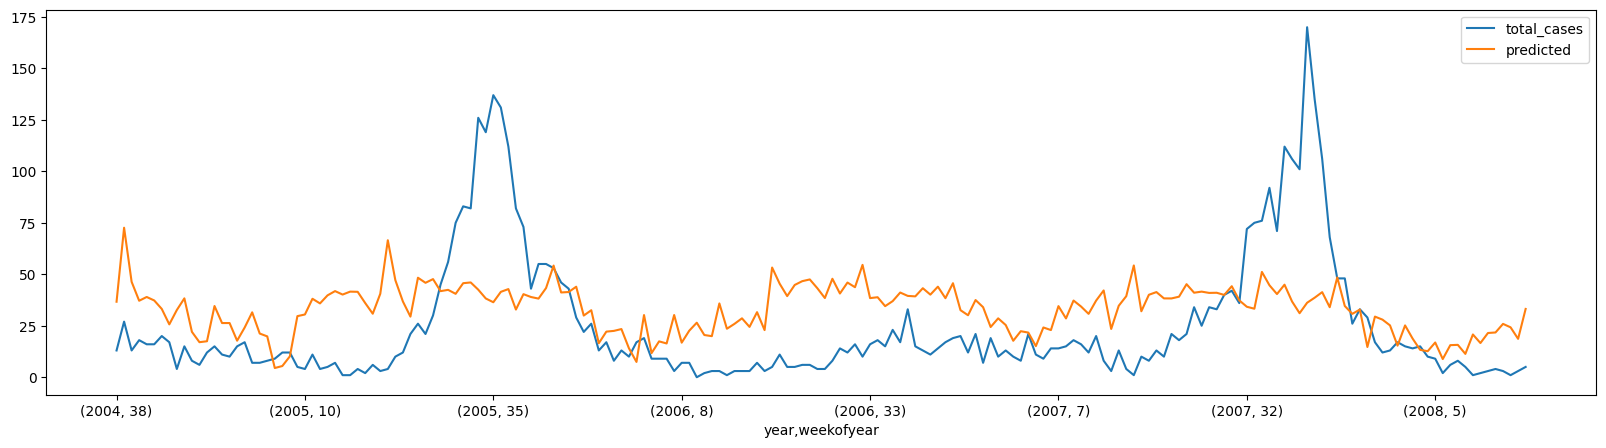

In [32]:
# plot predictions and actual values (total_cases)
lin_test_sj  = pd.DataFrame(y_test)
lin_pred_sj = pd.DataFrame(y_pred)
lin_pred_sj = lin_pred_sj.rename(columns= {0:'predicted'})
plot = lin_test_sj.plot(figsize=(20,5))
plt2 = lin_pred_sj.plot(ax=plot)
plt.legend()

### Iquitos

[ 0.41503459  0.05033606 -0.76320373  0.00323618]
Intercept: 
 -4.525000811956733
Coefficients: 
 [ 0.41503459  0.05033606 -0.76320373  0.00323618]
                                 OLS Regression Results                                
Dep. Variable:            total_cases   R-squared (uncentered):                   0.329
Model:                            OLS   Adj. R-squared (uncentered):              0.322
Method:                 Least Squares   F-statistic:                              50.40
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                    1.59e-34
Time:                        17:52:42   Log-Likelihood:                         -1564.2
No. Observations:                 416   AIC:                                      3136.
Df Residuals:                     412   BIC:                                      3153.
Df Model:                           4                                                  
Covariance Type:            nonrobust                       

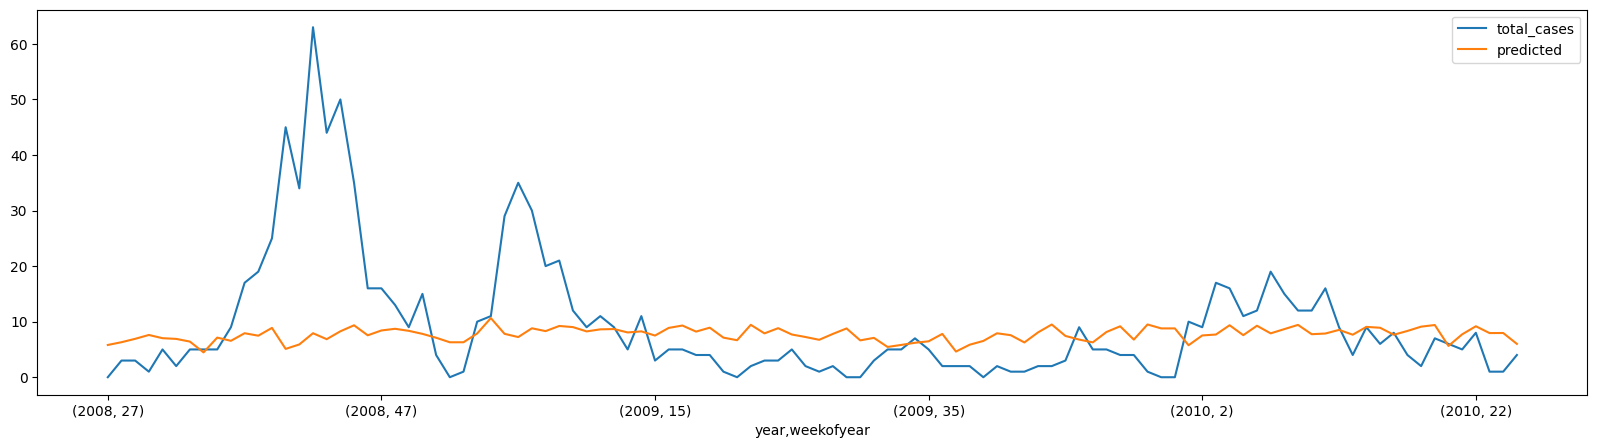

In [33]:
# set input and output vars
X = iq_train_features[['reanalysis_max_air_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_tdtr_k', 'station_precip_mm']]

y = iq_train_features["total_cases"]
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False) 

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(regr.coef_)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
 
model = sm.OLS(y_train, X_train).fit()

y_pred = regr.predict(X_test)
 
print_model = model.summary()
print(print_model)
print(metrics.mean_absolute_error(y_test, y_pred))

lin_test_iq  = pd.DataFrame(y_test)
lin_pred_iq = pd.DataFrame(y_pred)
lin_pred_iq = lin_pred_iq.rename(columns= {0:'predicted'})
plot = lin_test_iq.plot(figsize=(20,5))
plt2 = lin_pred_iq.plot(ax=plot)
plt.legend()


# 

Now we can drop 'week_start_date', since it is not needed for our random forest and SVM models

In [34]:
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)
sj_train_features.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
1990 18                      24.422857              24.592857   
     19                      25.061429              25.292857   
     20                      25.631429              25.728571   
     21                      25.837143              26.078571   
     22                      26.368571              26.514286   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
1990 18                            19.264286                      26.65   
     19                            20.801429                      27.75   
     20                            22.284286                      27.35   
     21                            22.160000                      28.25   
     22                            22.671429                      28.75   

                 reanalysis_min_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              22.75  ...   
     19                              23.25  ...   
     20                              24.15  ...   
     21                              23.85  ...   
     22                              24.35  ...   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  \
year weekofyear                                                              
1990 18                        29.4                20.0               16.0   
     19                        31.7                22.2                8.6   
     20                        32.2                22.8          

In [35]:
features_sj = sj_train_features.drop(['total_cases'],axis=1)
features_iq = iq_train_features.drop(['total_cases'], axis=1)
output_sj = sj_train_features[['total_cases']].values.reshape(-1, 1)
output_iq = iq_train_features[['total_cases']].values.reshape(-1, 1)

X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(features_sj, output_sj, test_size=0.2, shuffle=False,random_state= 0)
X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(features_iq, output_iq, test_size=0.2, shuffle=False,random_state= 0)

In [36]:
scaler = StandardScaler()

y_train_sj = y_train_sj.ravel()
y_test_sj = y_test_sj.ravel()
y_train_iq = y_train_iq.ravel()
y_test_iq = y_test_iq.ravel()

## Random forest

### Build random forest regression model

### San Jose

In [37]:
def FindHyperparameter(city: str):
    regressor = RandomForestRegressor()

    if city == "iq":
        Xtrain = X_train_iq
        Xtest = X_test_iq
        ytrain = y_train_iq.ravel()
        ytest = y_test_iq.ravel()
    else:
        print("sj")
        Xtrain = X_train_sj
        Xtest = X_test_sj
        ytrain = y_train_sj
        ytest = y_test_sj


    # Define the grid search parameters
    param_grid = {
        'n_estimators': [10,20,40,100,200,400],
        'max_depth': [2,5,25,50,100],
        'min_samples_leaf': [5,10,2,20],
        'min_samples_split': [2, 5, 10],
        'max_features': ['auto'],
        'criterion' : ['mae']
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5,verbose=3)
    grid_search.fit(Xtrain, ytrain)
    # Print the best parameters and best score
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    print(city)
    # Evaluate the best model on the validation set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(Xtest)
    mae = mean_absolute_error(ytest, y_pred)
    print("Validation MAE: ", mae)

    plt.plot(y_pred, label='Predicted')
    plt.plot(ytest, label='Actual')
    plt.legend()
    plt.show()
    return best_model

print('Hyperparameter for San Juan:')
print('Hyperparameter for Iquitos:')


Hyperparameter for San Juan:
Hyperparameter for Iquitos:


#### Make predicitions with hyperparameters:

In [38]:
#Best parameters:  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
regressor = RandomForestRegressor(bootstrap= True, max_depth =  5, min_samples_leaf =  5, min_samples_split = 5, n_estimators= 50, max_features= 'auto', criterion="mae", random_state=0)

regressor.fit(X_train_sj, y_train_sj)
y_pred_sj = regressor.predict(X_test_sj)

Lets calculate the MAE:

In [39]:
print(metrics.mean_absolute_error(y_test_sj, y_pred_sj))

22.18585106382979


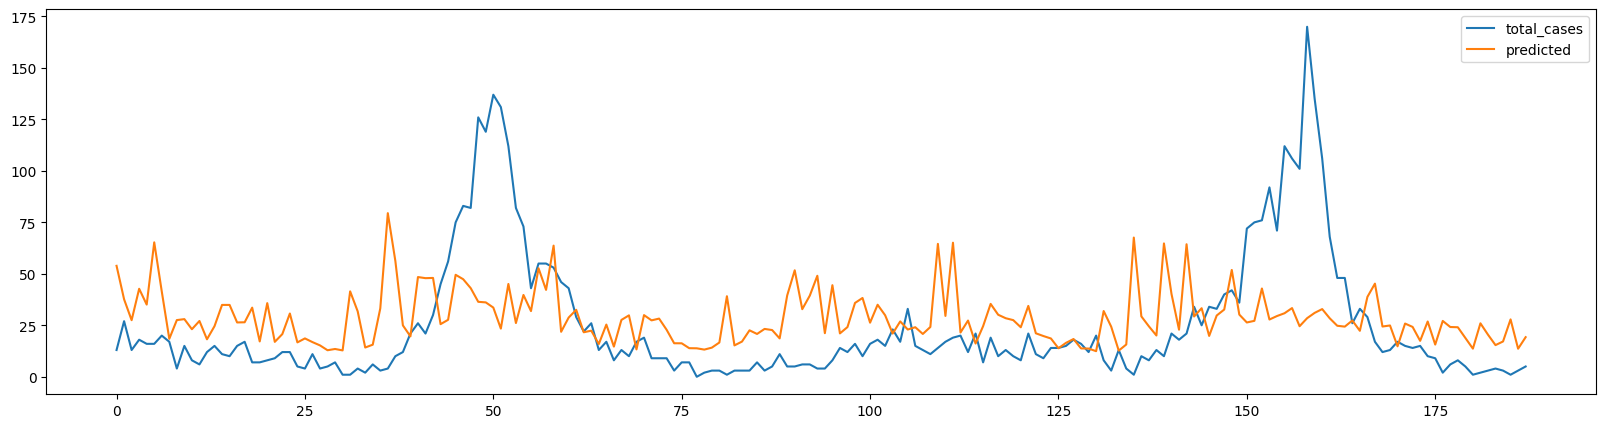

In [40]:
plt.figure(figsize=(20,5))
plt.plot(y_test_sj, label='total_cases')
plt.plot(y_pred_sj, label='predicted')

plt.legend()
plt.show()

In [41]:
xtest = pd.DataFrame(X_test_sj)
xtest.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
2004 38          0.040150  0.074925  0.094871  0.139443                 52.29   
     39          0.040150 -0.067450  0.225257  0.233200                245.73   
     40          0.033475  0.007625  0.243580  0.178633                 10.06   
     41         -0.016800  0.025267  0.090471  0.058367                 34.73   
     42         -0.016800  0.093750  0.236029  0.213871                 83.20   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
2004 38                      27.950000              28.107143   
     39                      26.648571              26.807143   
     40                      27.878571              28.057143   
     41                      27.530000              27.528571   
     42                      27.358571              27.528571   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
2004 38                            24.154286                      30.15   
     39                            23.931429                      29.75   
     40                            23.328571                      30.45   
     41                            23.434286                      29.35   
     42                            23.714286                      30.25   

                 reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                                               
2004 38                              26.15                            16.00   
     39                              24.55                           254.95   
     40                              25.55                             8.57   
     41                              25.75                            35.70   
     42                              25.45                            41.40   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
2004 38                                     80.032857   
     39                                     85.330000   
     40                                     76.471429   
     41                                     78.477143   
     42                                     80.665714   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
2004 38                                 52.29   
     39                                245.73   
     40                                 10.06   
     41                                 34.73   
     42                                 83.20   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
2004 38                                      18.904286           2.428571   
     39                                      18.645714           2.542857   
     40                                      17.964286           3.671429   
     41                                      18.072857           2.557143   
     42                                      18.402857           3.157143   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
2004 38                   28.642857                 6.114286   
     39                   27.228571                 6.057143   
     40                   29.142857                 8.085714   
     41                   28.285714                 6.214286   
     42                   28.128571                 6.185714   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weekofyear                                                             
2004 38                    

### Iquitos

In [42]:
#Best parameters:  {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 5, 'n_estimators': 20}

y_train_iq = y_train_iq.ravel()

regressor = RandomForestRegressor(bootstrap= True, max_depth= 2, max_features= 'auto', min_samples_leaf= 20, min_samples_split= 5, n_estimators= 100, criterion='mae', random_state=0)

regressor.fit(X_train_iq, y_train_iq)
y_pred_iq = regressor.predict(X_test_iq)

print("MAE: " + metrics.mean_absolute_error(y_test_iq, y_pred_iq))


6.980240384615384


Plot results:

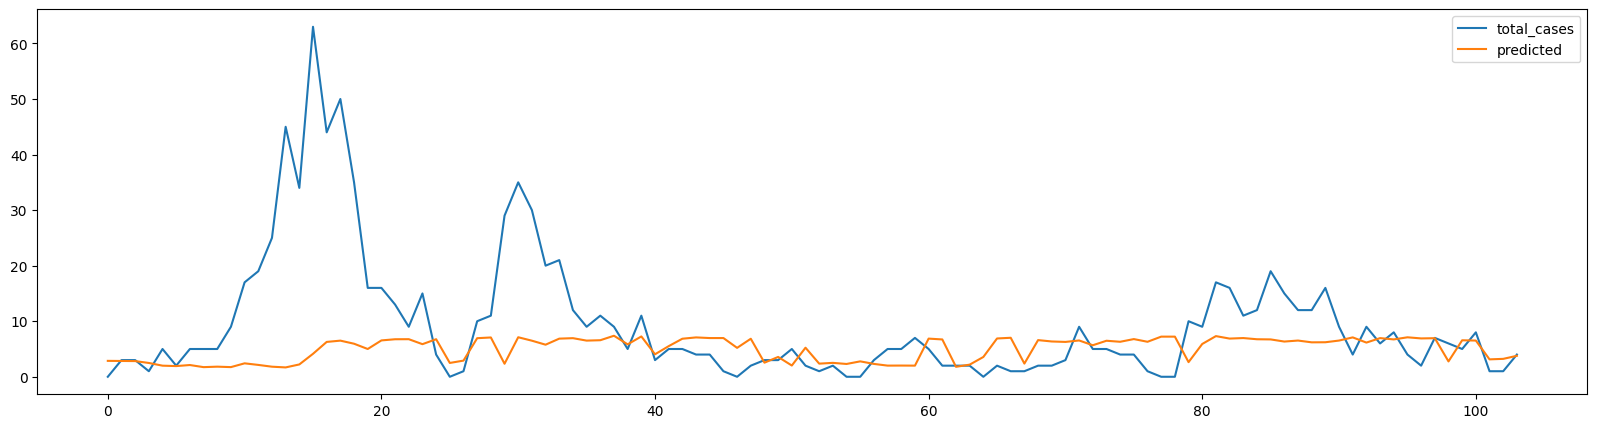

In [43]:
plt.figure(figsize=(20,5))

plt.plot(y_test_iq, label='total_cases')
plt.plot(y_pred_iq, label='predicted')

plt.legend()
plt.show()

### Support Vector Machines

### San Jose

In [44]:
scaler = StandardScaler()

X_train_sj = scaler.fit_transform(X_train_sj)
X_test_sj = scaler.fit_transform(X_test_sj)


X_train_iq = scaler.fit_transform(X_train_iq)
X_test_iq = scaler.fit_transform(X_test_iq)

In [45]:

def get_svm_hyperparams(city: str):
    if city == 'sj':
        train = X_train_sj
        test = X_test_sj
        y_train =y_train_sj
        y_test = y_test_sj
    else:
        train = X_train_iq
        test = X_test_iq
        y_train =y_train_iq
        y_test = y_test_iq
    param_grid = {'C': [0.1,5,10,100],
              'gamma': ['scale','auto'],
              'kernel': ['rbf','linear','sigmoid','poly'],
              'epsilon': [0.001,0.009,0.1]
              }

    grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3,scoring='neg_mean_absolute_error')

    grid.fit(train,y_train)

    print("Best hyperparameters:", grid.best_params_)

    # Train the model using the identified hyperparameters and the training set
    svm = SVR(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'],epsilon= grid.best_params_['epsilon'])
    svm_fitted = svm.fit(train, y_train)

    # Evaluate the model using the testing set
    y_pred_svm = svm_fitted.predict(test)
    mae = mean_absolute_error(y_test,y_pred_svm)

    print("mean abs. error", mae)
    return svm_fitted  



To start the grid search for San Juan again, execute the following cell:

In [46]:
# get best hyperparams

#get_svm_hyperparams('sj')

In [47]:
#Best hyperparameters: {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
svm = SVR(C=100, epsilon=0.1, gamma= 'scale', kernel= 'linear')
#svm = SVR()
svm.fit(X_train_sj, y_train_sj)

# Evaluate the model using the testing set
y_pred_svm_sj = svm.predict(X_test_sj)
mae = mean_absolute_error(y_test_sj,y_pred_svm_sj)
print(mae)

18.086897369995405


Plot results:

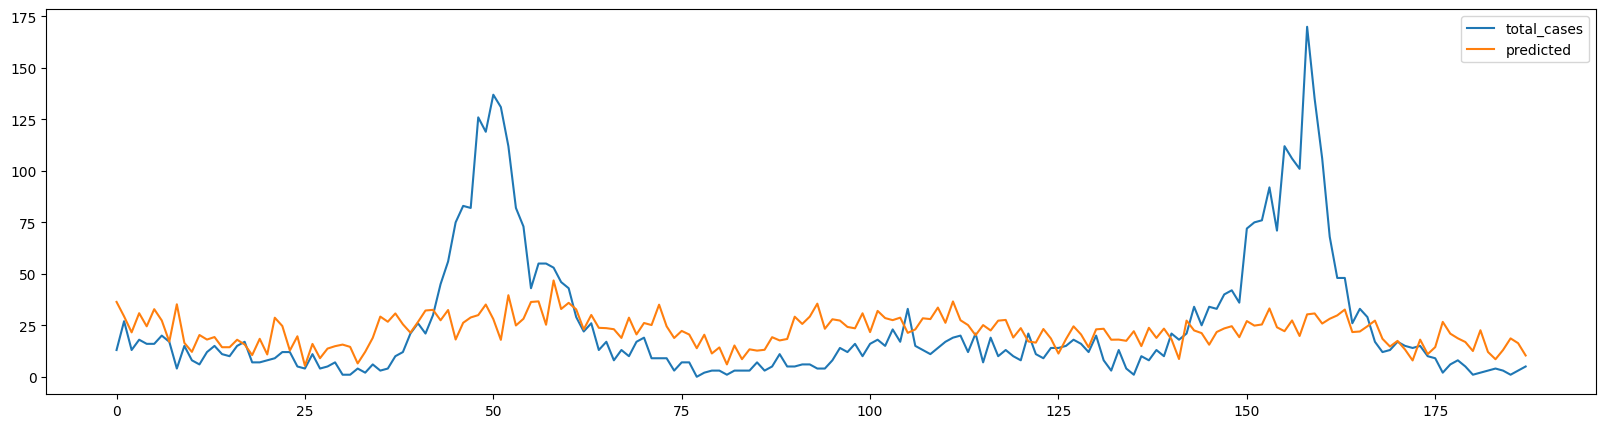

In [48]:
plt.figure(figsize=(20,5))
plt.plot(y_test_sj, label='total_cases')
plt.plot(y_pred_svm_sj, label='predicted')
plt.legend()
plt.show()

In [49]:
print(metrics.mean_absolute_error(y_test_sj, y_pred_svm_sj))

18.086897369995405


### Iquitos

Use get_svm_hyperparams to find hyperparameter using gridsearch

To start the grid search again, execute the following cell:

In [50]:
#get_svm_hyperparams('iq')

In [51]:
#Best hyperparameters: {'C': 0.1, 'epsilon': 0.001, 'gamma': 'auto', 'kernel': 'linear'}

regressor_iq = SVR(C=0.1,epsilon=0.001, gamma= 'auto', kernel= 'linear')

regressor_iq.fit(X_train_iq,y_train_iq)
y_pred_iq = regressor_iq.predict(X_test_iq)

Plot results:

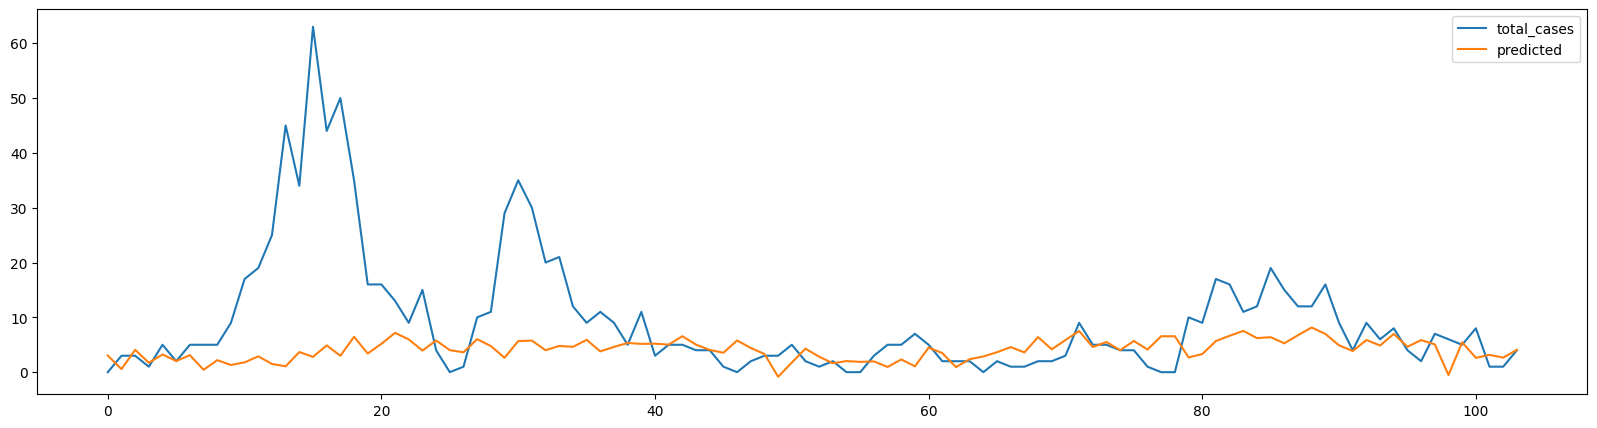

In [52]:
plt.figure(figsize=(20,5))
plt.plot(y_test_iq, label='total_cases')
plt.plot(y_pred_iq, label='predicted')

plt.legend()
plt.show()

In [53]:
print(metrics.mean_absolute_error(y_test_iq, y_pred_iq))

7.086532876961727


### Time Series Analysis

In [69]:
# Checking For Stationarity using an ADF-Test
from statsmodels.tsa.stattools import adfuller
def adf_test(dataframe):
     test = adfuller(dataframe, autolag = 'AIC')
     print("1. ADF : ",test[0])
     print("2. P-Value : ", test[1])
     print("3. num lags : ", test[2])
     print("4. Num observations:", test[3])
     print("5. Critical values :")
     for key, val in test[4].items():
         print("\t",key, ": ", val)

adf_test(feature_train_values['total_cases'])

1. ADF :  -6.623258235685171
2. P-Value :  5.963285375798595e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1443
5. Critical Values :
	 1% :  -3.434889827343955
	 5% :  -2.863545026607168
	 10% :  -2.5678374612882515


In [55]:
# converting week_start_date to datetime object 
arima_features_sj['week_start_date'] = pd.to_datetime(arima_features_sj['week_start_date'], infer_datetime_format=True)
arima_features_iq['week_start_date'] = pd.to_datetime(arima_features_iq['week_start_date'], infer_datetime_format=True)
# setting index
arima_features_sj.set_index('week_start_date', inplace=True)
arima_features_iq.set_index('week_start_date', inplace=True)

In [56]:
# make a 80/20 split
train_size = int(0.8 * len(arima_features_sj))
train_data = arima_features_sj.iloc[:train_size]
test_data = arima_features_sj.iloc[train_size:]


train_size_iq = int(0.8 * len(arima_features_iq))
train_data_iq = arima_features_iq.iloc[:train_size_iq]
test_data_iq  = arima_features_iq.iloc[train_size_iq:]

In [57]:
# autoarima fit 
recursiveFit = auto_arima(train_data['total_cases'],trace =True)

arima_features_iq.head()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6057.071, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6082.107, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6060.340, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6063.861, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6080.107, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6056.426, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6058.198, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6058.617, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6060.892, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6058.248, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6055.076, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6059.027, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6057.073, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6060.145, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,23.590000,25.300000,22.034286,34.15,19.95,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,23.484286,25.278571,22.208571,33.45,17.95,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,23.265714,24.242857,22.472857,31.35,19.45,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,22.207143,23.078571,19.647143,30.45,15.45,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,23.282857,24.485714,20.807143,33.85,18.35,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


### San Juan

In [58]:
# creating model
mod_sj= sm.tsa.ARIMA(train_data['total_cases'], order=(2, 1, 6))
# fitting model
results_sj = mod_sj.fit()
# summary
print(results_sj.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7259      0.042     40.618      0.000       1.643       1.809
ar.L2         -0.7714      0.049    -15.696      0.000      -0.868      -0.675
ma.L1         -1.5838      0.047    -33.491      0.000      -1.677      -1.491
ma.L2          0.5833      0.060      9.649      0.000       0.465       0.702
ma.L3         -0.0547      0.040     -1.375      0.169      -0.133       0.023
ma.L4          0.2565      0.040      6.397      0.000       0.178       0.335
ma.L5         -0.0891      0.037     -2.439      0.015      -0.161      -0.017
ma.L6         -0.0745      0.022     -3.369      0.001      -0.118      -0.031
sigma2       174.8523      4.013     43.574      0.000     166.987     182.717


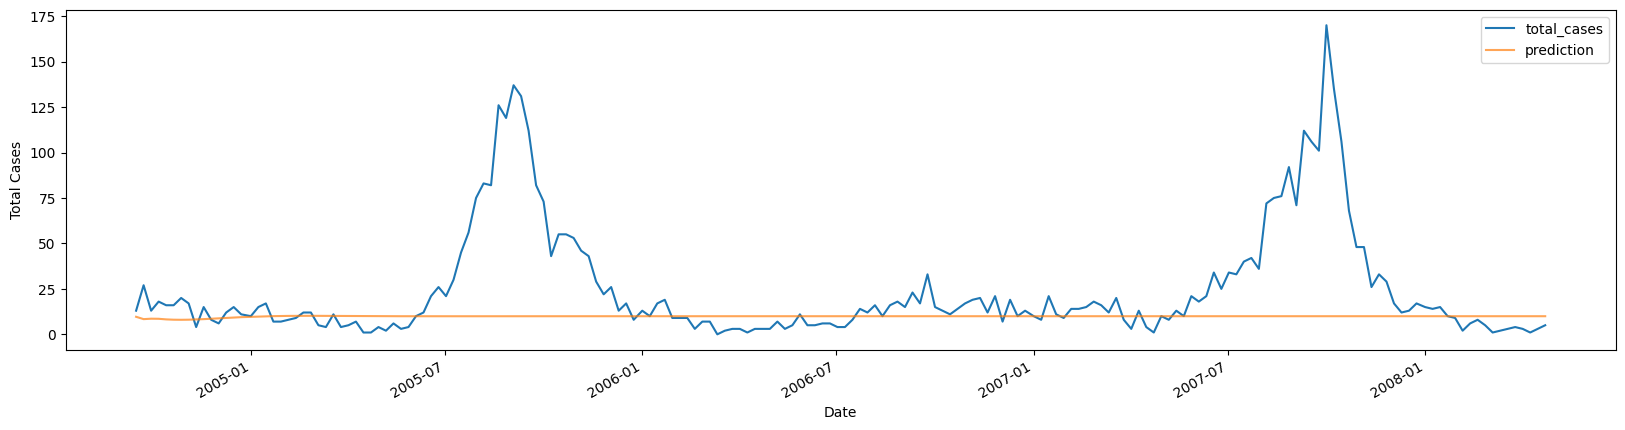

(188,)

In [67]:
# prediction start
start=len(train_data)
# prediction end
end=len(train_data)+len(test_data)-1
# forecasting 
pred = results_sj.forecast(len(test_data))
# setting index
pred.index = arima_features_sj.index[start:end+1]
# setting actual target var
y_sj = test_data['total_cases']
#aadding actual test set plot
ax = y_sj['1990':].plot(label='total_cases')
# plotting actual values of the test set (total_cases) and predicted values 
pred.plot(ax=ax, label='prediction', alpha=.7, figsize=(20, 5))
# setting labels
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
plt.legend()
plt.show()

In [60]:
print(mean_absolute_error(test_data['total_cases'],pred))

18.300440196927422


### Iquitos

In [61]:
# Create model
mod_iq= sm.tsa.ARIMA(train_data['total_cases'], order=(2, 1, 6))
#fit model
results_iq = mod_iq.fit()
print(results_sj.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7259      0.042     40.618      0.000       1.643       1.809
ar.L2         -0.7714      0.049    -15.696      0.000      -0.868      -0.675
ma.L1         -1.5838      0.047    -33.491      0.000      -1.677      -1.491
ma.L2          0.5833      0.060      9.649      0.000       0.465       0.702
ma.L3         -0.0547      0.040     -1.375      0.169      -0.133       0.023
ma.L4          0.2565      0.040      6.397      0.000       0.178       0.335
ma.L5         -0.0891      0.037     -2.439      0.015      -0.161      -0.017
ma.L6         -0.0745      0.022     -3.369      0.001      -0.118      -0.031
sigma2       174.8523      4.013     43.574      0.000     166.987     182.717


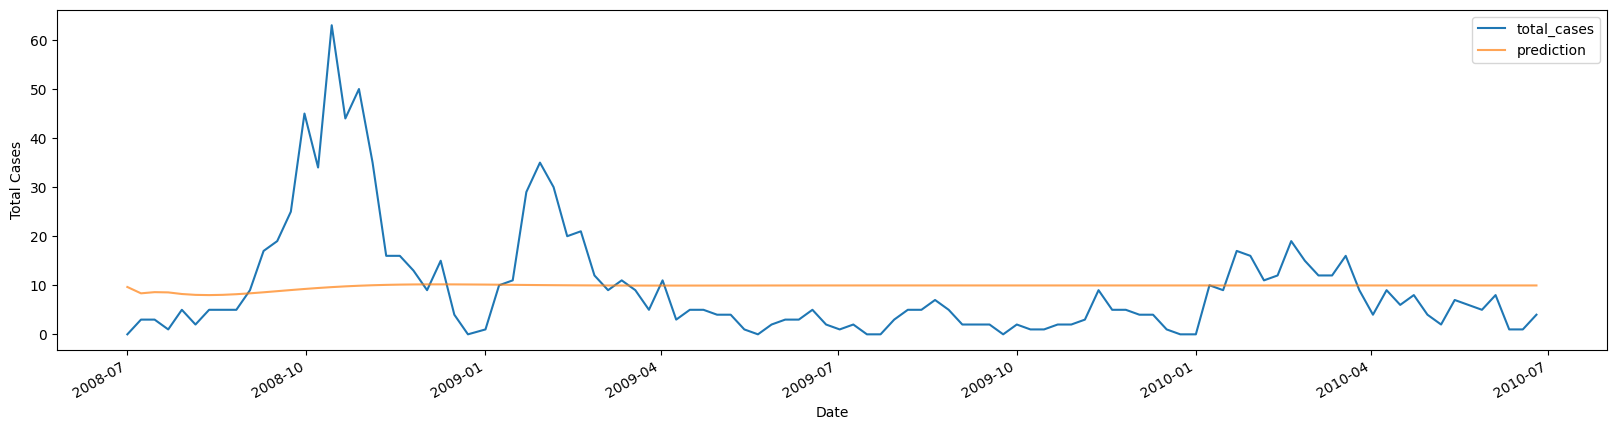

(104,)

In [62]:
# prediction start
start=len(train_data_iq)
# prediction end
end=len(train_data_iq)+len(test_data_iq)-1
# forecasting 
pred = results_iq.forecast(steps= len(test_data_iq))
# setting index
pred.index = arima_features_iq.index[start:end+1]
# setting actual target var
y_iq = test_data_iq['total_cases']
# adding actual test set plot
ax = y_iq['1990':].plot(label='total_cases')
# plotting actual values of the test set (total_cases) and predicted values 
pred.plot(ax=ax, label='prediction', alpha=.7, figsize=(20, 5))
#s etting labels
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
plt.legend()
plt.show()

In [63]:
# Calculating the MAE
print(mean_absolute_error(test_data_iq['total_cases'],pred))

7.914733323340384
